In [1]:
# loading basic python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the train dataset

#picking the file to read from the drive 
drive_url = 'https://drive.google.com/file/d/12ThOjsRhFPsiGimey9Q-LttboKfQCvH1/view?usp=sharing' #Read the Excel Sheet, which contains 4000 House properties scraped from zolo.ca.
new_url = 'https://drive.google.com/uc?export=download&id=' + drive_url.split('/')[-2] #Save into temporary location

# reading csv file 
train_data = pd.read_csv(new_url)

# first 5 samples from dataset
train_data.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [3]:
# Loading the test dataset

# picking the file to read from the drive 
drive_url = 'https://drive.google.com/file/d/1l2CTUkdL8I9wUFfFTntM8efej3xILNtB/view?usp=sharing' #Read the Excel Sheet, which contains 4000 House properties scraped from zolo.ca.
new_url = 'https://drive.google.com/uc?export=download&id=' + drive_url.split('/')[-2] #Save into temporary location

# reading csv file 
test_data = pd.read_csv(new_url)

# first 5 samples from dataset
test_data.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,0x6e93,Apartment,293,3.0,1,Unfurnished,0.0,No,Once in a day - Morning,7.28,Well above average,Medium,152.0,2.52
1,0x8787,Apartment,586,4.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,7.63,Well below average,Medium,92.0,4.16
2,0x6c17,Container Home,305,1.0,2,Semi_Furnished,1.0,No,All time,5.39,Slightly above average,Medium,90.0,2.92
3,0x9dbd,Apartment,258,2.0,1,Semi_Furnished,1.0,No,All time,7.53,Slightly below average,Medium,158.0,3.45
4,0xbfde,Bungalow,3031,12.0,4,Fully Furnished,0.0,No,All time,8.79,Well above average,High,186.0,2.72


In [4]:
# Basic information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             39499 non-null  object 
 1   Property_Type           39499 non-null  object 
 2   Property_Area           39499 non-null  int64  
 3   Number_of_Windows       37845 non-null  float64
 4   Number_of_Doors         39499 non-null  int64  
 5   Furnishing              38457 non-null  object 
 6   Frequency_of_Powercuts  38116 non-null  float64
 7   Power_Backup            39499 non-null  object 
 8   Water_Supply            39499 non-null  object 
 9   Traffic_Density_Score   39499 non-null  float64
 10  Crime_Rate              38712 non-null  object 
 11  Dust_and_Noise          38280 non-null  object 
 12  Air_Quality_Index       39499 non-null  float64
 13  Neighborhood_Review     39499 non-null  float64
 14  Habitability_score      39499 non-null

- Our dataset has total 14 features and 39499 samples.
- Habitability_Score is our target variable.
- Dataset has both categorical and numerical feature.
- Some of the features has null values. 

In [5]:
# finding number of null values in the features/predictors
train_data.isnull().sum()

Property_ID                  0
Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                1042
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

- 5 features have null values, we will fill this null values using appropriate imputation.

# Filling Null values

In [6]:
# Here all the variables are categorical so we filled the null values with the mode of that column
Number_of_Windows_mode = train_data['Number_of_Windows'].mode()[0]
train_data['Number_of_Windows'].fillna(Number_of_Windows_mode,inplace=True)

Furnishing_mode = train_data['Furnishing'].mode()[0]
train_data['Furnishing'].fillna(Furnishing_mode,inplace=True)

Frequency_of_Powercuts_mode = train_data['Frequency_of_Powercuts'].mode()[0]
train_data['Frequency_of_Powercuts'].fillna(Frequency_of_Powercuts_mode,inplace=True)

Crime_Rate_mode = train_data['Crime_Rate'].mode()[0]
train_data['Crime_Rate'].fillna(Crime_Rate_mode,inplace=True)

Dust_and_Noise_mode = train_data['Dust_and_Noise'].mode()[0]
train_data['Dust_and_Noise'].fillna(Dust_and_Noise_mode,inplace=True)

In [7]:
# Here all the variables are categorical so we filled the null values with the mode of train dataset.
test_data['Number_of_Windows'].fillna(Number_of_Windows_mode,inplace=True)
test_data['Furnishing'].fillna(Furnishing_mode,inplace=True)
test_data['Frequency_of_Powercuts'].fillna(Frequency_of_Powercuts_mode,inplace=True)
test_data['Crime_Rate'].fillna(Crime_Rate_mode,inplace=True)
test_data['Dust_and_Noise'].fillna(Dust_and_Noise_mode,inplace=True)

In [8]:
# No null values now
train_data.isnull().sum()

Property_ID               0
Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64

#EDA

## Exploring Categorical Variable

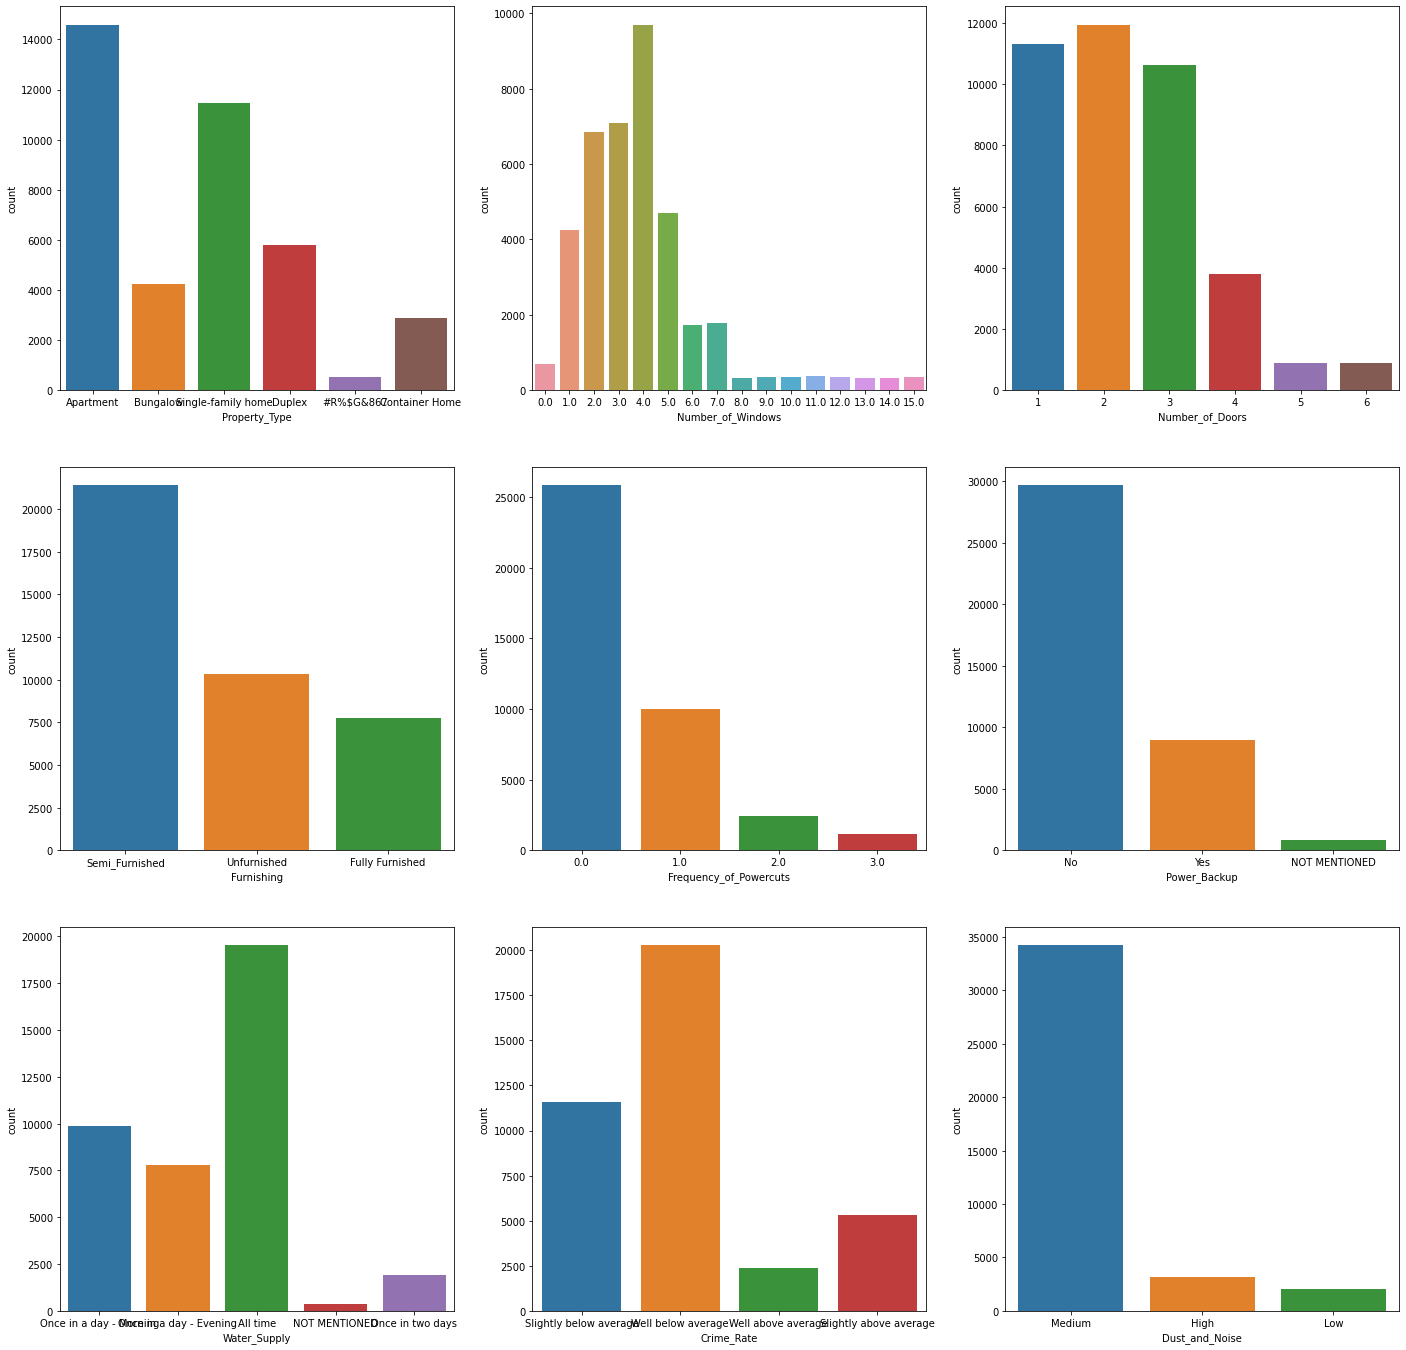

In [9]:
#Plotting categorical variables 

# Initialise the subplot function using number of rows and columns
fig1, ax = plt.subplots(3,3,figsize=(24,24))

sns.countplot(x='Property_Type',data=train_data,ax=ax[0,0])
sns.countplot(x='Number_of_Windows',data=train_data,ax=ax[0,1])
sns.countplot(x='Number_of_Doors',data=train_data,ax=ax[0,2])
sns.countplot(x='Furnishing',data=train_data,ax=ax[1,0])
sns.countplot(x='Frequency_of_Powercuts',data=train_data,ax=ax[1,1])
sns.countplot(x='Power_Backup',data=train_data,ax=ax[1,2])
sns.countplot(x='Water_Supply',data=train_data,ax=ax[2,0])
sns.countplot(x='Crime_Rate',data=train_data,ax=ax[2,1])
sns.countplot(x='Dust_and_Noise',data=train_data,ax=ax[2,2])

# Combine all the operations and display
plt.show()

**Insights**
- 60% people are leaving in Apartment and Single-family home.
- mostly people are having 2 to 5 windows in their home, very few have 8 or higher number of windows.
- Generally there are 1 to 3 doors in a house, few has 5 or 6 doors in a house.
- most homes are semi-furnished.
- There are very rare instance of powercut in the area.
- Mostly people don't prefer power_backup as they have very rare powercut instance.
- Mostly people have full day access to the water.

**Now we group the categories of the categorical varibles one by one to find how they are associated with the target varible.**

In [10]:
train_data.groupby(['Property_Type']).describe()['Habitability_score']

,count,mean,std,min,25%,50%,75%,max
Property_Type,,,,,,,,
#R%$G&867,510.0,73.546098,13.570252,17.81,70.150,75.755,81.6700,95.65
Apartment,14596.0,71.729413,15.146432,7.28,67.840,74.715,81.2800,98.18
Bungalow,4238.0,76.877683,11.504071,13.03,72.300,77.690,84.0575,99.59
Container Home,2872.0,71.290373,15.364032,14.27,67.195,74.340,81.0775,98.01
Duplex,5806.0,73.715543,14.035303,10.85,69.910,75.970,82.5300,99.45
Single-family home,11477.0,74.885441,12.931535,9.00,71.000,76.410,82.9400,100.00


In [11]:
temp_map = {'#R%$G&867':'Duplex',
            'Container Home':'Apartment',
            'Apartment':'Apartment',
            'Bungalow':'Bungalow',
            'Duplex':'Duplex',
            'Single-family home':'Duplex'}
train_data['Property_Type'] = train_data['Property_Type'].map(temp_map)
test_data['Property_Type'] = test_data['Property_Type'].map(temp_map)

- We can Duplex and #R%$G&867 categories into one as their statistical properties are almost same.
- We can do same wih Container Home and Apartment.

In [12]:
train_data.groupby(['Property_Type']).describe()['Habitability_score']

,count,mean,std,min,25%,50%,75%,max
Property_Type,,,,,,,,
Apartment,17468.0,71.657228,15.182852,7.28,67.73,74.65,81.2425,98.18
Bungalow,4238.0,76.877683,11.504071,13.03,72.30,77.69,84.0575,99.59
Duplex,17793.0,74.465304,13.331281,9.00,70.57,76.26,82.7700,100.00


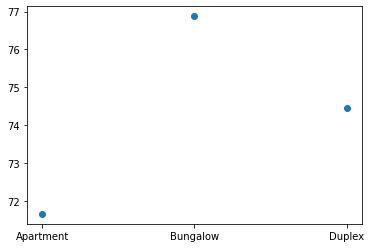

In [13]:
temp = train_data.groupby(['Property_Type']).describe()['Habitability_score']['mean']
y = temp.to_list()
x = temp.index.to_list()

plt.scatter(x,y)

**People living in bunglow has high Habitability score**

In [14]:
train_data.groupby(['Number_of_Windows']).describe()['Habitability_score']

,count,mean,std,min,25%,50%,75%,max
Number_of_Windows,,,,,,,,
0.0,699.0,71.115651,15.828907,14.28,66.4500,74.300,81.3850,95.18
1.0,4254.0,71.248973,15.500377,8.52,67.3000,74.520,81.0500,96.56
2.0,6857.0,73.142466,14.405741,9.94,69.3200,75.690,82.0900,98.35
3.0,7080.0,72.812123,14.466330,12.58,69.1700,75.305,81.6725,98.58
4.0,9707.0,73.339527,14.164954,7.28,69.4300,75.570,82.3250,99.55
5.0,4708.0,74.714911,12.889620,10.85,70.9100,76.245,82.5525,100.00
6.0,1738.0,74.469229,13.495646,11.77,70.1675,76.390,82.9950,98.23
7.0,1784.0,74.819613,13.409348,13.03,70.9800,76.880,83.1200,98.87
8.0,326.0,76.281994,12.224592,22.61,72.2475,77.900,84.1825,98.11


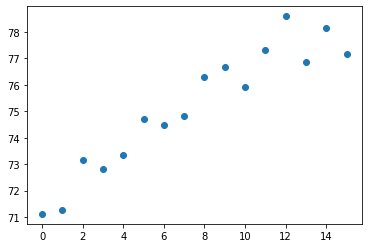

In [15]:
temp = train_data.groupby(['Number_of_Windows']).describe()['Habitability_score']['mean']
y = temp.to_list()
x = temp.index.to_list()

plt.scatter(x,y)

**As number of windows increases avg habitability score increases.**

In [16]:
train_data.groupby(['Number_of_Doors']).describe()['Habitability_score']

,count,mean,std,min,25%,50%,75%,max
Number_of_Doors,,,,,,,,
1,11337.0,72.681231,14.471308,10.85,68.830,75.20,81.77,98.58
2,11958.0,73.093228,14.370756,7.28,69.280,75.51,81.94,100.00
3,10647.0,73.462614,14.119908,8.52,69.750,75.77,82.28,99.55
4,3789.0,75.401127,12.858782,13.03,71.280,76.91,83.48,98.24
5,871.0,76.533100,11.937749,22.32,72.385,77.51,83.91,99.59
6,897.0,77.959476,10.990192,20.98,73.520,78.08,84.77,99.18


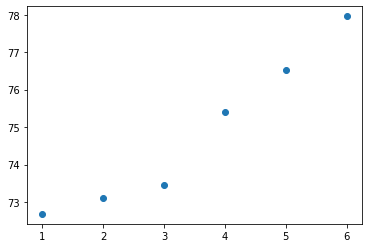

In [17]:
temp = train_data.groupby(['Number_of_Doors']).describe()['Habitability_score']['mean']
y = temp.to_list()
x = temp.index.to_list()

plt.scatter(x,y)

**As number of doors increases avg habitability score increases.**

In [18]:
train_data.groupby(['Furnishing']).describe()['Habitability_score']

,count,mean,std,min,25%,50%,75%,max
Furnishing,,,,,,,,
Fully Furnished,7756.0,81.065201,7.484549,26.51,75.6100,80.945,86.6900,100.00
Semi_Furnished,21399.0,75.386587,11.221937,16.76,71.1400,76.290,82.3800,99.59
Unfurnished,10344.0,63.857112,17.760374,7.28,56.4575,69.280,76.2425,95.71


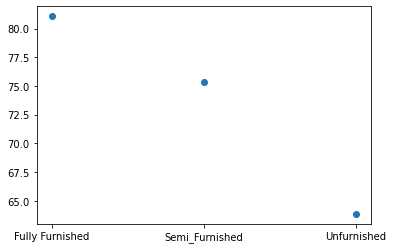

In [19]:
temp = train_data.groupby(['Furnishing']).describe()['Habitability_score']['mean']
y = temp.to_list()
x = temp.index.to_list()

plt.scatter(x,y)

**avg Habitability score of Furnished home is significantly higher compared to the unfurnished home. Standard deviation of Habitability score increase with decrease in furniture in the home.**
- We can consider this categorical varible as ordinal and can encode as 0,1,2 rather than one hot encoding.

In [20]:
train_data.groupby(['Frequency_of_Powercuts']).describe()['Habitability_score']

,count,mean,std,min,25%,50%,75%,max
Frequency_of_Powercuts,,,,,,,,
0.0,25854.0,75.375844,12.323829,10.85,71.080,76.65,83.1200,100.00
1.0,10010.0,71.716998,15.017956,7.28,67.750,74.78,81.1575,98.19
2.0,2441.0,66.648513,18.015034,12.81,60.210,72.27,78.6500,96.19
3.0,1194.0,61.251256,20.084020,8.52,42.825,68.50,76.2375,96.02


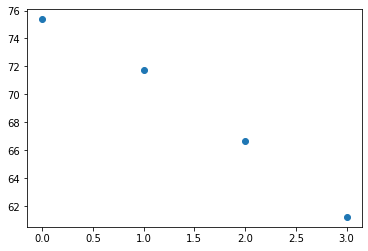

In [21]:
temp = train_data.groupby(['Frequency_of_Powercuts']).describe()['Habitability_score']['mean']
y = temp.to_list()
x = temp.index.to_list()

plt.scatter(x,y)

**Habitability score is inversely propotional to number of power cuts.**

In [22]:
train_data.groupby(['Power_Backup']).describe()['Habitability_score']

,count,mean,std,min,25%,50%,75%,max
Power_Backup,,,,,,,,
NOT MENTIONED,828.0,73.756304,13.691085,10.88,70.19,75.565,82.0925,96.84
No,29714.0,71.396196,14.757762,7.28,67.74,74.340,80.5200,97.83
Yes,8957.0,80.377410,8.790342,16.95,74.98,80.540,86.6600,100.00


**People having power backup has high Habitability score**

In [23]:
train_data.groupby(['Water_Supply']).describe()['Habitability_score']

,count,mean,std,min,25%,50%,75%,max
Water_Supply,,,,,,,,
All time,19511.0,75.792935,12.267286,13.93,71.510,77.00,83.580,100.00
NOT MENTIONED,345.0,73.990667,14.091686,15.02,70.190,77.05,82.120,97.78
Once in a day - Evening,7815.0,70.179611,15.779910,7.28,66.125,73.93,80.020,97.97
Once in a day - Morning,9897.0,73.209474,13.891459,11.77,69.310,75.42,81.970,98.52
Once in two days,1931.0,64.809259,18.747326,9.94,57.230,71.08,77.665,96.66


**Water supply is directly proportional to Habitability score**
- we can consider this as ordinal categorical variable.

In [24]:
train_data.groupby(['Crime_Rate']).describe()['Habitability_score']

,count,mean,std,min,25%,50%,75%,max
Crime_Rate,,,,,,,,
Slightly above average,5303.0,64.952978,17.459247,8.52,57.9400,70.12,77.1400,96.74
Slightly below average,11580.0,73.556079,12.638285,14.40,69.4775,75.44,81.2225,98.52
Well above average,2357.0,55.011052,20.419591,7.28,35.0900,60.76,72.7600,95.30
Well below average,20259.0,77.821766,9.566478,17.81,72.6800,77.89,84.4300,100.00


**As crime rate is decreases Habitability score increases**
- we can consider this as ordinal categorical variable.

In [25]:
train_data.groupby(['Dust_and_Noise']).describe()['Habitability_score']

,count,mean,std,min,25%,50%,75%,max
Dust_and_Noise,,,,,,,,
High,3212.0,67.291600,18.228357,7.28,61.4000,72.57,79.8650,98.30
Low,2072.0,77.115536,11.789961,21.91,72.5675,77.82,84.7425,100.00
Medium,34215.0,73.843438,13.638159,9.94,69.9300,75.88,82.3400,99.59


**Dust and Noise is indirectly proportional to Habitability score**
- we can consider this as ordinal categorical variable.

## Exploring Numerical Varibles

In [26]:
num_var = ['Property_Area','Number_of_Windows', 'Number_of_Doors','Traffic_Density_Score','Air_Quality_Index', 'Neighborhood_Review','Habitability_score']

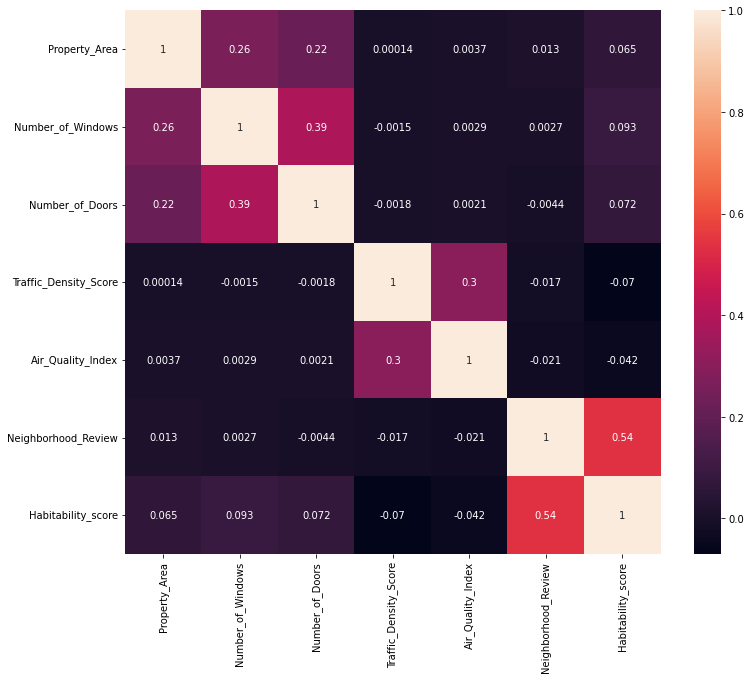

In [27]:
# Plotting correlation between numerical features and target variable
plt.figure(figsize = (12,10))
sns.heatmap(train_data[num_var].corr(),annot=True)

**Neighbourhood Review is very important feature as it is highly correlated with target variable.**

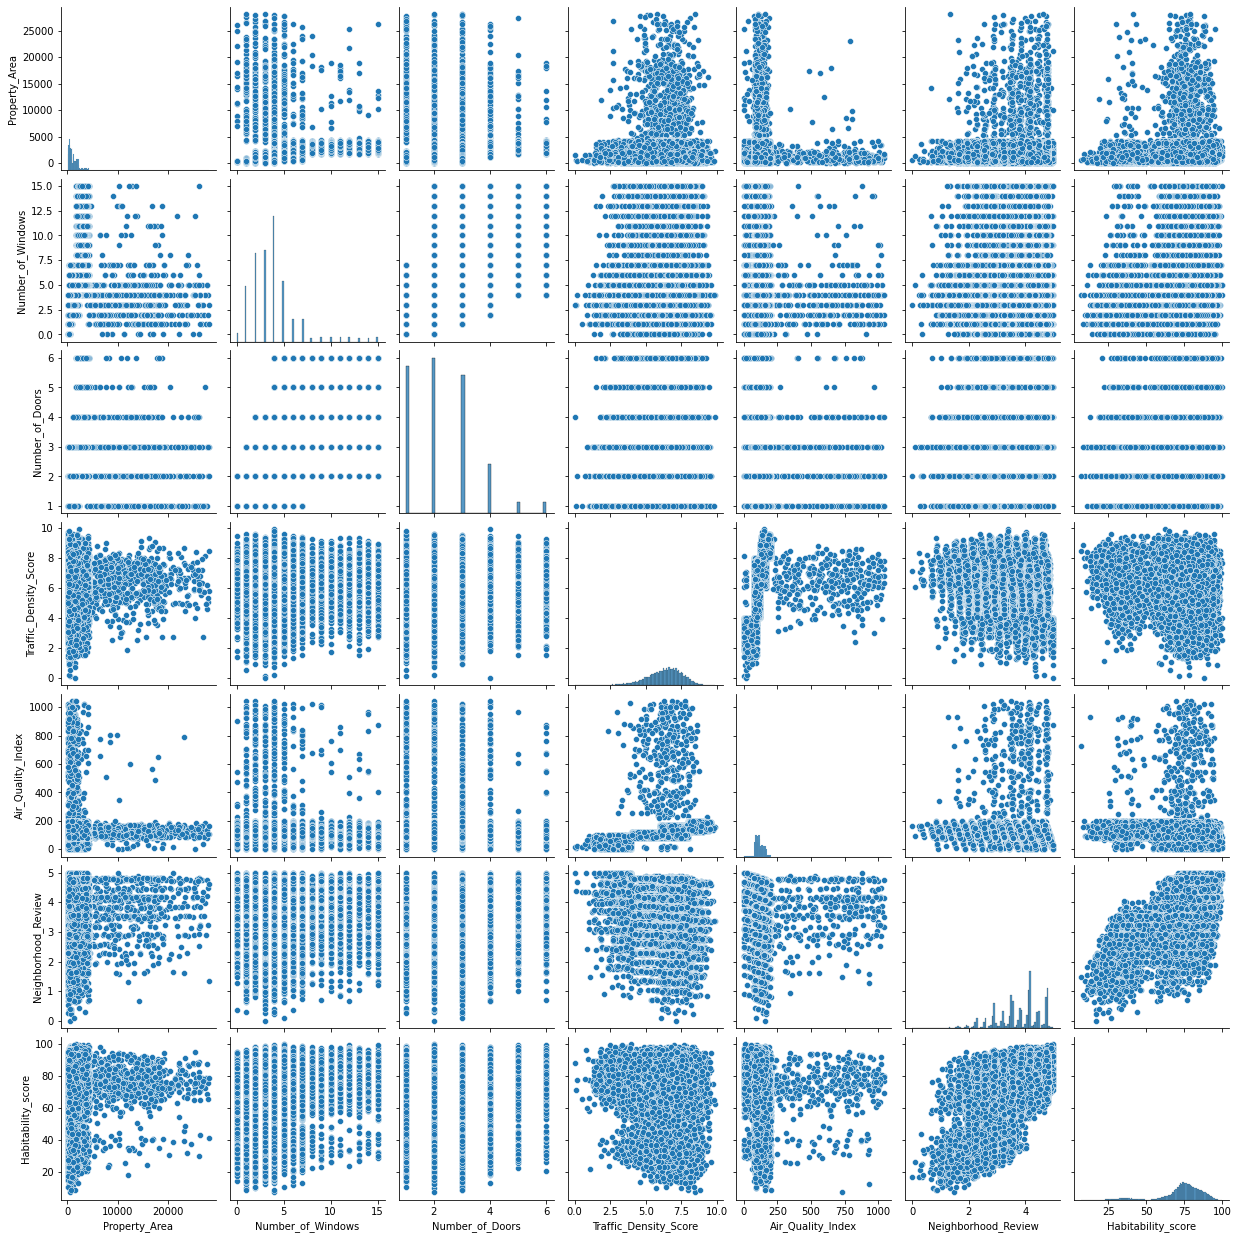

In [28]:
sns.pairplot(train_data[num_var])

In [29]:
num_var

['Property_Area',
 'Number_of_Windows',
 'Number_of_Doors',
 'Traffic_Density_Score',
 'Air_Quality_Index',
 'Neighborhood_Review',
 'Habitability_score']

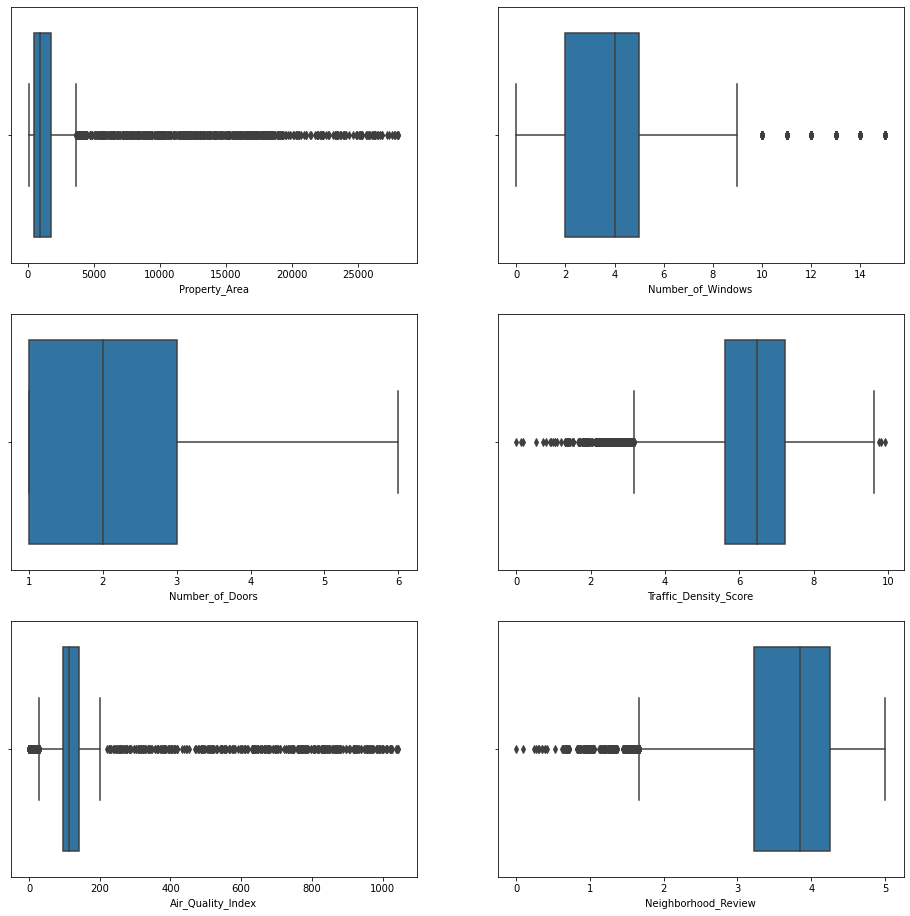

In [30]:
# Initialise the subplot function using number of rows and columns
fig1, ax = plt.subplots(3,2,figsize=(16,16))

sns.boxplot(x='Property_Area',data=train_data,ax=ax[0,0])
sns.boxplot(x='Number_of_Windows',data=train_data,ax=ax[0,1])
sns.boxplot(x='Number_of_Doors',data=train_data,ax=ax[1,0])
sns.boxplot(x='Traffic_Density_Score',data=train_data,ax=ax[1,1])
sns.boxplot(x='Air_Quality_Index',data=train_data,ax=ax[2,0])
sns.boxplot(x='Neighborhood_Review',data=train_data,ax=ax[2,1])

# Combine all the operations and display
plt.show()

In [31]:
train_data[num_var].describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
count,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000
mean,1391.715638,3.926960,2.331375,6.354772,121.352566,3.735945,73.482297
std,1953.287544,2.634091,1.179964,1.219681,62.384669,0.796843,14.118753
min,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.280000
25%,494.000000,2.000000,1.000000,5.600000,95.000000,3.220000,69.660000
50%,932.000000,4.000000,2.000000,6.470000,113.000000,3.850000,75.760000
75%,1770.000000,5.000000,3.000000,7.220000,140.000000,4.260000,82.260000
max,28064.000000,15.000000,6.000000,9.910000,1044.000000,5.000000,100.000000


# Encoding Categorical Varibales

In [32]:
# Function which converts the categorical variable into one-hot encoding format
def encoding_cat_variable(column_name,data):
  temp = pd.get_dummies(data[column_name],prefix=column_name)
  temp.drop(temp.columns[-1],axis=1,inplace=True)
  data.drop(column_name,axis=1,inplace=True)
  data = pd.concat([temp,data],axis=1)
  return data

In [33]:
# We one-hot encode the property_type variable
train_data = encoding_cat_variable('Property_Type',train_data)
test_data = encoding_cat_variable('Property_Type',test_data)

In [34]:
# performing ordinal encoding on Furnishing categorical varible
train_data['Furnishing'] = train_data['Furnishing'].map({'Unfurnished':1,'Semi_Furnished':2,'Fully Furnished':3})
test_data['Furnishing'] = test_data['Furnishing'].map({'Unfurnished':1,'Semi_Furnished':2,'Fully Furnished':3})

In [35]:
# performing ordinal encoding on power_backup categorical varible
train_data['Power_Backup'] = train_data['Power_Backup'].apply(lambda x : 1 if x=='Yes' else 0)
test_data['Power_Backup'] = test_data['Power_Backup'].apply(lambda x : 1 if x=='Yes' else 0)

In [36]:
# performing ordinal encoding on water_supply categorical varible
water_supply_mapping = {'Once in two days':1,'Once in a day - Evening':2,'Once in a day - Morning':3,'All time':4,'NOT MENTIONED':4}
train_data['Water_Supply'] = train_data['Water_Supply'].map(water_supply_mapping)
test_data['Water_Supply'] = test_data['Water_Supply'].map(water_supply_mapping)

In [37]:
# performing ordinal encoding on crime_rate categorical varible
crime_rate_mapping = {'Well above average':1,'Slightly above average':2,'Slightly below average':3,'Well below average':4}
train_data['Crime_Rate'] = train_data['Crime_Rate'].map(crime_rate_mapping)
test_data['Crime_Rate'] = test_data['Crime_Rate'].map(crime_rate_mapping)

In [38]:
# performing ordinal encoding on dust_and_noise categorical varible
train_data['Dust_and_Noise'] = train_data['Dust_and_Noise'].map({'High':1,'Medium':2,'Low':3})
test_data['Dust_and_Noise'] = test_data['Dust_and_Noise'].map({'High':1,'Medium':2,'Low':3})

# feature engineering

In [39]:
# Feature variables
X = train_data.drop(['Habitability_score','Property_ID'],axis=1)

# Target variable
y = train_data['Habitability_score']

In [40]:
# Splitting the dataset into train and validation set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Should we apply scaling on nominal as well as one hot encoded Features?

In [41]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [42]:
X_test = scaler.transform(X_test)

# Modelling
- we will try several base algorithms and ensemble methods to check which performs the best.
- We then do hyper-parameter tuning for the algorithm that will performs the best.

In [43]:
from sklearn import metrics

# this function takes model instance, train and test data. And returns the prediction and metrics
def train_and_predict(reg,X_train,y_train,X_test,y_test):
  reg.fit(X_train,y_train)
  y_pred = reg.predict(X_test)
  mse = metrics.mean_squared_error(y_pred,y_test)
  score = reg.score(X_test,y_test)
  return mse,y_pred,score

In [44]:
# Trying first algorithm Linear regression to see how well it performs
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
mse,y_pred,score = train_and_predict(lr_reg,X_train,y_train,X_test,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score}')

mean square error is 84.49326092298848 
and accuracy score is 0.5702762845527181


In [45]:
# Trying another algorithm Knn
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
mse,y_pred,score = train_and_predict(knn_reg,X_train,y_train,X_test,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score}')

mean square error is 49.598642996118144 
and accuracy score is 0.747746590478244


In [46]:
# Trying another algorithm Support vector regression
from sklearn.svm import SVR

svr_reg = SVR()
mse,y_pred,score = train_and_predict(svr_reg,X_train,y_train,X_test,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score}')

mean square error is 54.29162699596105 
and accuracy score is 0.7238785742729604


In [47]:
# Trying another algorithm decision tree
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
mse,y_pred,score = train_and_predict(dt_reg,X_train,y_train,X_test,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score}')

mean square error is 68.04612964556962 
and accuracy score is 0.6539246404544214


# Ensemble models

In [48]:
# Trying random forestRegressor model
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
mse,y_pred,score = train_and_predict(rf_reg,X_train,y_train,X_test,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score} ')

mean square error is 36.429717748350214 
and accuracy score is 0.8147223400717679 


In [49]:
# Checking importance of each feature used 
rf_reg.feature_importances_

array([0.00534528, 0.00428245, 0.08783644, 0.01957737, 0.01076634,
       0.24944473, 0.01934373, 0.11603004, 0.00600504, 0.04068906,
       0.00997165, 0.01038846, 0.0298213 , 0.39049812])

In [50]:
# Trying AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

adr_reg = AdaBoostRegressor()
mse,y_pred,score = train_and_predict(adr_reg,X_train,y_train,X_test,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score} ')

mean square error is 82.01564578103519 
and accuracy score is 0.5828771709739324 


In [51]:
# Trying GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gbrt_reg = GradientBoostingRegressor()
mse,y_pred,score = train_and_predict(gbrt_reg,X_train,y_train,X_test,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score} ')

mean square error is 49.87814352406051 
and accuracy score is 0.7463250805965702 


In [52]:
# Trying xgboost
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
mse,y_pred,score = train_and_predict(xgb_reg,X_train,y_train,X_test,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score} ')

[03:24:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mean square error is 49.756014958036786 
and accuracy score is 0.7469462134606668 


## Neural Network Model

In [53]:
# basic Neural Network model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.01))

model.fit(X, y, epochs=30, batch_size=30)

Epoch 1/30
1317/1317 [==============================] - 4s 2ms/step - loss: 424.2657
Epoch 2/30
1317/1317 [==============================] - 3s 2ms/step - loss: 134.1731
Epoch 3/30
1317/1317 [==============================] - 3s 2ms/step - loss: 113.9430
Epoch 4/30
1317/1317 [==============================] - 3s 2ms/step - loss: 113.5418
Epoch 5/30
1317/1317 [==============================] - 3s 2ms/step - loss: 114.1556
Epoch 6/30
1317/1317 [==============================] - 3s 2ms/step - loss: 104.4883
Epoch 7/30
1317/1317 [==============================] - 3s 2ms/step - loss: 105.5139
Epoch 8/30
1317/1317 [==============================] - 3s 2ms/step - loss: 96.7441
Epoch 9/30
1317/1317 [==============================] - 3s 2ms/step - loss: 91.0648
Epoch 10/30
1317/1317 [==============================] - 3s 2ms/step - loss: 87.8134
Epoch 11/30
1317/1317 [==============================] - 3s 2ms/step - loss: 92.4357
Epoch 12/30
1317/1317 [==============================] - 3s 2ms/ste

In [54]:
y_pred = model.predict(X_test)

In [55]:
# testing nn model performance
from sklearn import metrics

mse = metrics.mean_squared_error(y_pred,y_test)
r2 = metrics.r2_score(y_test,y_pred)

# Cross-Validation

In [56]:
# performing cross-validation on best performing model to check for the overfitting
from sklearn.model_selection import cross_val_score

rf_reg = RandomForestRegressor()
scores = cross_val_score(rf_reg,X,y,cv=4)
print(f'scores of cross validation is {scores}')

scores of cross validation is [0.82512751 0.81608269 0.82284666 0.82141753]


# Experimentation
- Property_Type merging
- selecting feature (Using selectKfeature)
- Hyper-parameter Tuning of Best model

## Feature selection using selectKfeature

In [57]:
# Experimenting by selecting different feature from SelectKBest method
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=10) #K=13,7,10
fs.fit(X_train,y_train)
X_train_new = fs.transform(X_train)
X_test_new = fs.transform(X_test)

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
mse,y_pred,score = train_and_predict(rf_reg,X_train_new,y_train,X_test_new,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score} ')

mean square error is 45.82755476325978 
and accuracy score is 0.7669259431153785 


# Hyper-parameter Tuning

- Trying Tuning with 2 best performing model.

In [59]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# # Create a based model
# rf = RandomForestRegressor()

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1, verbose = 2)
# grid_search.fit(X_train, y_train)

In [60]:
# rf_best_param = grid_search.best_params_
# rf_best_param

In [61]:
# rf_reg = RandomForestRegressor(
# bootstrap = True,
# max_depth = 110,
# max_features = 3,
# min_samples_leaf = 3,
# min_samples_split = 8,
# n_estimators = 300)

In [62]:
# mse,y_pred,score = train_and_predict(rf_reg,X_train,y_train,X_test,y_test)
# print(f'mean square error is {mse} \nand accuracy score is {score} ')

In [63]:
# from sklearn.model_selection import GridSearchCV

# parameters = {'kernel': ('linear', 'rbf','poly'), 
#               'C':[1.5, 10],
#               'gamma': [1e-7, 1e-4],
#               'epsilon':[0.1,0.2,0.5,0.3]}


# # Create a based model
# svr_gs = SVR()

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = svr_gs, param_grid = parameters, cv=2, n_jobs = -1, verbose = 2)
# grid_search.fit(X_train, y_train)


In [64]:
# rf_best_param = grid_search.best_params_
# rf_best_param

In [65]:
# svr_best = SVR(C=10,epsilon=0.5,gamma=1e-07,kernel='linear')

# mse,y_pred,score = train_and_predict(svr_best,X_train,y_train,X_test,y_test)
# print(f'mean square error is {mse} \nand accuracy score is {score}')

# Results

- Finding prediction using the best performing model.

In [66]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X,y)

RandomForestRegressor()

In [67]:
rf_reg.feature_importances_

array([0.00498754, 0.00517726, 0.08843713, 0.01980672, 0.01044683,
       0.2589345 , 0.01720994, 0.11994765, 0.00654924, 0.04044844,
       0.01220958, 0.0109139 , 0.03069359, 0.37423768])

In [68]:
prediction = rf_reg.predict(test_data.drop('Property_ID',axis=1))

In [69]:
data = {
  "Property_ID": test_data['Property_ID'],
  "Habitability_score": prediction
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

df.to_csv('result.csv')